In [44]:
from psutil import *

In [45]:
cpu_count()

2

In [46]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
mnist['data'].shape

(70000, 784)

In [7]:
mnist['target'].shape

(70000,)

In [8]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [9]:
print(f"Train labels shape: {train_lbl.shape}, Test labels shape: {test_lbl.shape}")

Train labels shape: (56000,), Test labels shape: (14000,)


In [10]:
print(f"Train images shape: {train_img.shape}, Test images shape: {test_img.shape}")

Train images shape: (56000, 784), Test images shape: (14000, 784)


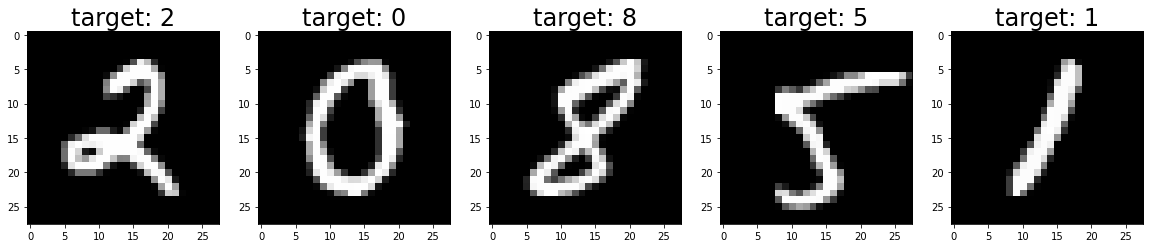

In [11]:
idx = np.random.randint(mnist['data'].shape[0]-5)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist['data'][idx:idx+5], mnist['target'][idx:idx+5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.title(f"target: {label}", size=24)

### Solver SAGA

Sin normalizar:

In [33]:
model_saga = LogisticRegression(solver = 'saga')

In [34]:
model_saga.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
test_pred = model_saga.predict(test_img)
cm_saga = confusion_matrix(test_lbl, test_pred)
score = model_saga.score(test_img, test_lbl)
print(f'Training Precision Score: {model_saga.score(train_img, train_lbl)}')
print(f"Test Precision Score: {score}")
print(classification_report(test_lbl, test_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Training Precision Score: 0.9396428571428571
Test Precision Score: 0.9157857142857143


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1387
           1       0.95      0.97      0.96      1580
           2       0.92      0.90      0.91      1443
           3       0.90      0.88      0.89      1435
           4       0.92      0.93      0.92      1350
           5       0.88      0.86      0.87      1231
           6       0.93      0.95      0.94      1387
           7       0.93      0.92      0.92      1458
           8       0.87      0.89      0.88      1368
           9       0.88      0.89      0.89      1361

   micro avg       0.92      0.92      0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



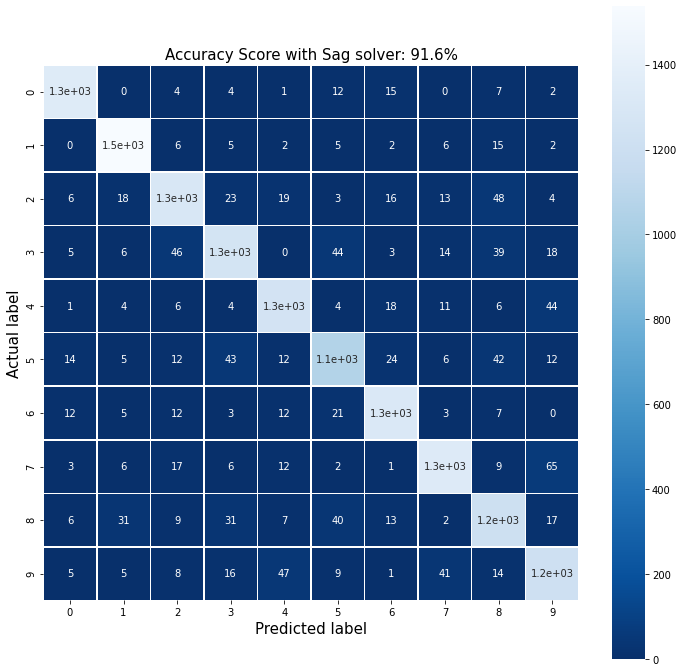

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_saga, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with Sag solver: {np.round(100*score,1)}%', size = 15)
plt.show()

Normalizando:

In [12]:
model_saga_n = LogisticRegression(solver = 'saga')
model_saga_n.fit(train_img/255., train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
test_pred = model_saga_n.predict(test_img/255.)
cm_saga_n = confusion_matrix(test_lbl, test_pred)
score = model_saga_n.score(test_img/255., test_lbl)
print(f'Training Precision Score: {model_saga_n.score(train_img/255., train_lbl)}')
print(f"Test Precision Score: {score}")

Training Precision Score: 0.9399642857142857
Test Precision Score: 0.9176428571428571


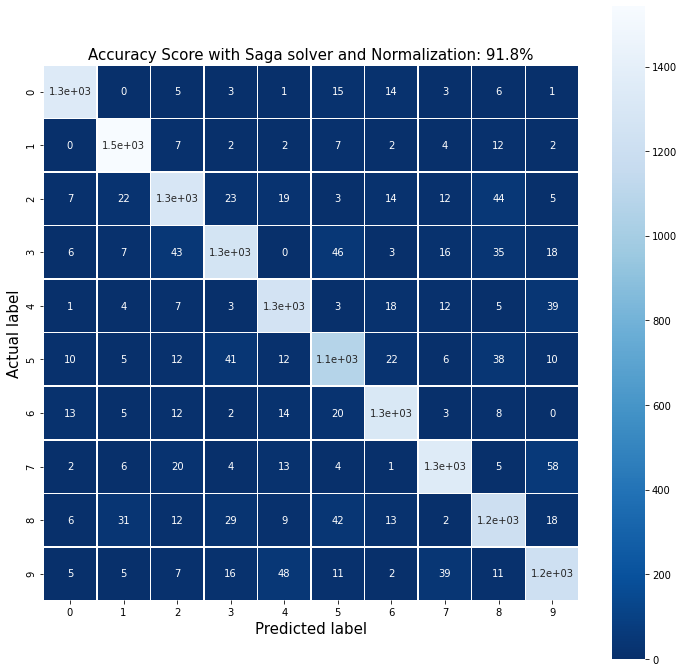

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_saga_n, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with Saga solver and Normalization: {np.round(100*score,1)}%', size = 15)
plt.show()

### Solver SAG

Sin normalizar:

In [38]:
model_sag = LogisticRegression(solver = 'sag')
model_sag.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
test_pred = model_sag.predict(test_img)
cm_sag = confusion_matrix(test_lbl, test_pred)
score = model_sag.score(test_img, test_lbl)
print(f'Training Precision Score: {model_sag.score(train_img, train_lbl)}')
print(f"Test Precision Score: {score}")
print(classification_report(test_lbl, test_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Training Precision Score: 0.940875
Test Precision Score: 0.9155714285714286


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1387
           1       0.95      0.97      0.96      1580
           2       0.92      0.89      0.91      1443
           3       0.90      0.88      0.89      1435
           4       0.92      0.93      0.92      1350
           5       0.88      0.86      0.87      1231
           6       0.93      0.95      0.94      1387
           7       0.93      0.91      0.92      1458
           8       0.87      0.89      0.88      1368
           9       0.88      0.89      0.89      1361

   micro avg       0.92      0.92      0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



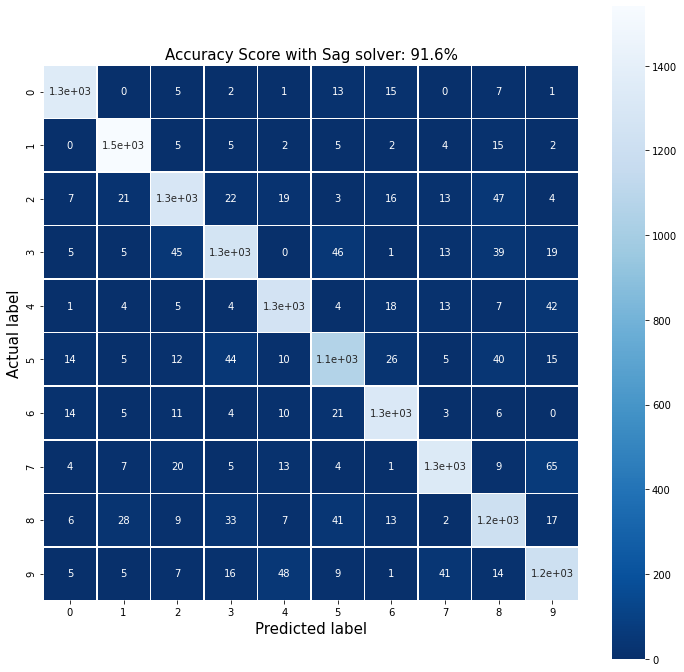

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_sag, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with Sag solver: {np.round(100*score,1)}%', size = 15)
plt.show()

Normalizando:

In [18]:
model_sag_n = LogisticRegression(solver = 'sag')
model_sag_n.fit(train_img/255., train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
test_pred = model_sag_n.predict(test_img/255.)
cm_sag_n = confusion_matrix(test_lbl, test_pred)
score = model_sag_n.score(test_img/255., test_lbl)
print(f'Training Precision Score: {model_sag_n.score(train_img/255., train_lbl)}')
print(f"Test Precision Score: {score}")
print(classification_report(test_lbl, test_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Training Precision Score: 0.940625
Test Precision Score: 0.9182857142857143


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1387
           1       0.95      0.98      0.96      1580
           2       0.91      0.90      0.90      1443
           3       0.91      0.88      0.90      1435
           4       0.92      0.93      0.93      1350
           5       0.88      0.88      0.88      1231
           6       0.94      0.95      0.94      1387
           7       0.93      0.92      0.93      1458
           8       0.88      0.88      0.88      1368
           9       0.89      0.89      0.89      1361

   micro avg       0.92      0.92      0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



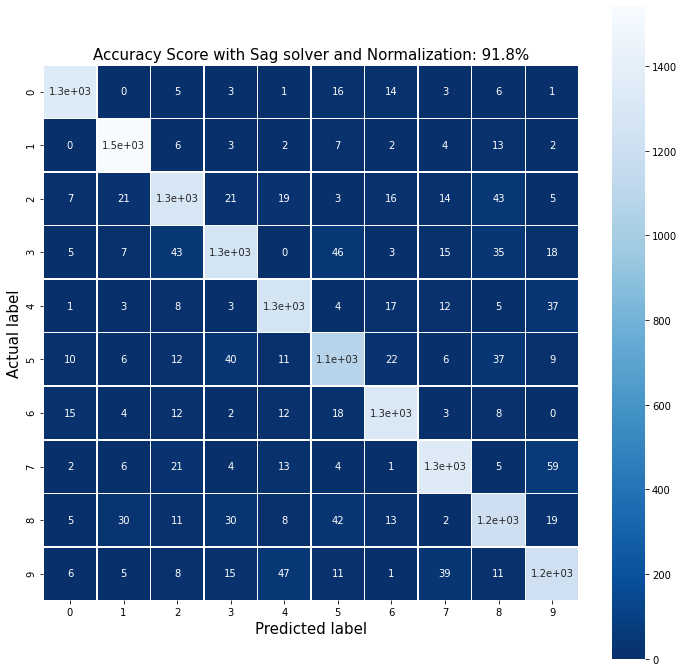

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_sag_n, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with Sag solver and Normalization: {np.round(100*score,1)}%', size = 15)
plt.show()

### Solver LBFGS

Sin normalizar:

In [41]:
model_lbfgs = LogisticRegression(solver = 'lbfgs', max_iter=100)
model_lbfgs.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
test_pred = model_lbfgs.predict(test_img)
cm_lbfgs = confusion_matrix(test_lbl, test_pred)
score = model_lbfgs.score(test_img, test_lbl)
print(f'Training Precision Score: {model_lbfgs.score(train_img, train_lbl)}')
print(f"Test Precision Score: {score}")
print(classification_report(test_lbl, test_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Training Precision Score: 0.9358214285714286
Test Precision Score: 0.9172142857142858


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1387
           1       0.95      0.98      0.96      1580
           2       0.90      0.90      0.90      1443
           3       0.91      0.88      0.89      1435
           4       0.91      0.93      0.92      1350
           5       0.89      0.86      0.87      1231
           6       0.94      0.94      0.94      1387
           7       0.93      0.92      0.93      1458
           8       0.86      0.88      0.87      1368
           9       0.90      0.89      0.90      1361

   micro avg       0.92      0.92      0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



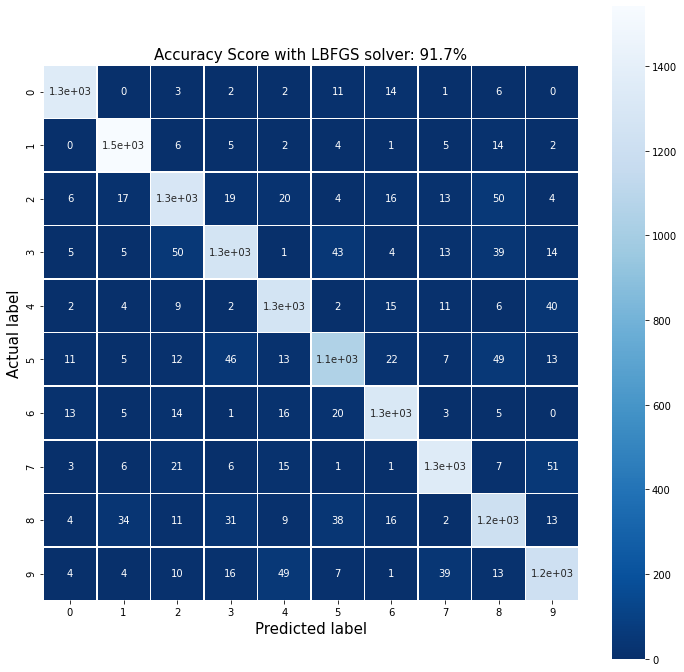

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_lbfgs, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with LBFGS solver: {np.round(100*score,1)}%', size = 15)
plt.show()

Normalizando:

In [30]:
model_lbfgs_n = LogisticRegression(solver = 'lbfgs', max_iter=100)
model_lbfgs_n.fit(train_img/255., train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
test_pred = model_lbfgs_n.predict(test_img/255.)
cm_lbfgs_n = confusion_matrix(test_lbl, test_pred)
score = model_lbfgs_n.score(test_img/255., test_lbl)
print(f'Training Precision Score: {model_lbfgs_n.score(train_img/255., train_lbl)}')
print(f"Test Precision Score: {score}")
print(classification_report(test_lbl, test_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Training Precision Score: 0.936875
Test Precision Score: 0.9190714285714285


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1387
           1       0.95      0.98      0.96      1580
           2       0.91      0.90      0.90      1443
           3       0.92      0.87      0.90      1435
           4       0.91      0.94      0.92      1350
           5       0.88      0.88      0.88      1231
           6       0.94      0.94      0.94      1387
           7       0.93      0.92      0.93      1458
           8       0.88      0.89      0.88      1368
           9       0.89      0.89      0.89      1361

   micro avg       0.92      0.92      0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



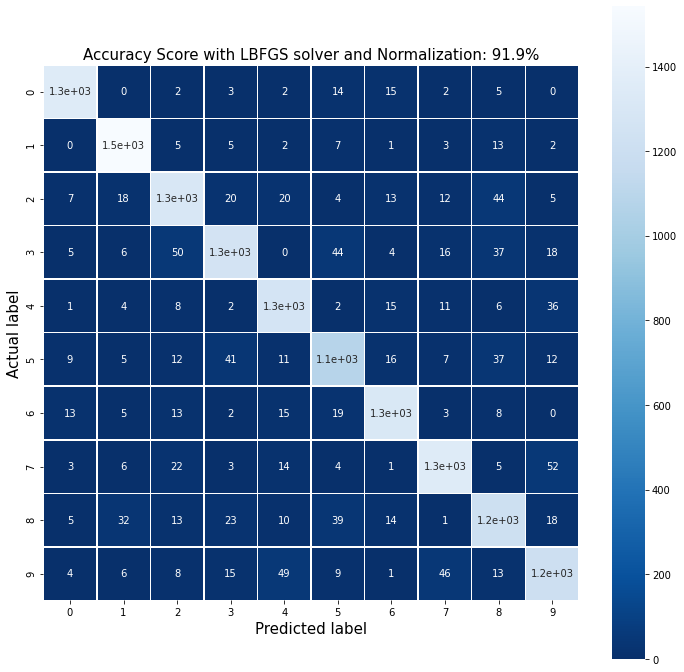

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_lbfgs_n, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score with LBFGS solver and Normalization: {np.round(100*score,1)}%', size = 15)
plt.show()